# Forecasting

Se usan la librería pandas y statsmodels.tsa para realizar un análisis de series de tiempo y predecir las ventas globales de videojuegos utilizando el modelo de suavizamiento exponencial. 

En primer lugar, se carga un conjunto de datos que contiene información sobre las ventas globales de videojuegos y se seleccionan las columnas de año y ventas globales. 

Luego, se convierte la columna de año a formato de fecha y se establece como el índice del dataframe. A continuación, se divide el conjunto de datos en un conjunto de entrenamiento y uno de prueba. 

Se crea el modelo de suavizamiento exponencial y se ajusta a los datos de entrenamiento. Luego se hace la predicción de las ventas globales para el conjunto de prueba y se grafican los resultados.

La gráfica muestra las ventas globales reales de los videojuegos durante el período de entrenamiento y prueba, así como las ventas predichas para el conjunto de prueba. La línea azul muestra los datos de entrenamiento, la línea naranja muestra los datos de prueba y la línea verde muestra las ventas predichas. 

En resumen, este código muestra cómo utilizar el modelo de suavizamiento exponencial para predecir las ventas globales de videojuegos y graficar los resultados.

/home/slayer24/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/slayer24/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/slayer24/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


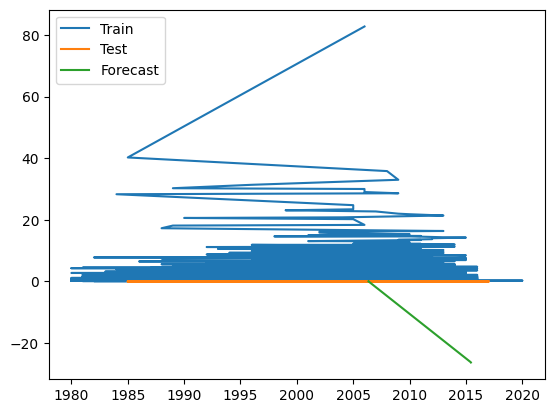

In [4]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# cargar datos
df = pd.read_csv('/home/slayer24/WorkSpace/MINERIA_DE_DATOS/DataSets/vgsales_limp.csv')

# seleccionar las columnas de interés
df = df[['AÑO', 'GLOBAL_VENTAS']]

# convertir la columna AÑO a datetime
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# establecer la columna AÑO como índice
df = df.set_index('AÑO')

# dividir los datos en train y test
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# crear y entrenar el modelo
model = ExponentialSmoothing(train_data['GLOBAL_VENTAS'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# hacer el forecasting
n_periods = len(test_data)
forecast = fitted_model.forecast(n_periods)

# graficar los resultados
plt.plot(train_data.index, train_data['GLOBAL_VENTAS'], label='Train')
plt.plot(test_data.index, test_data['GLOBAL_VENTAS'], label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.show()
